<center><h1>Pruevitas Abel</h1></center>
<center><h1>LaLiga Data Analysis</h1></center>

Tutorial: https://www.youtube.com/watch?v=S8Tb6E-bgrg

Equació: $E=mc^2$

Requirements and Connecting to the Database:

In [165]:
# Importing all the necessary libraries and checking if we are in the correct directory
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\abelb\\OneDrive\\Escriptori\\Modelling for Science and Engineering\\Research & Innovation\\la-quiniela-abel\\analysis'

In [166]:
# Create the connection to the database and the cursor
path = 'c:\\Users\\abelb\\OneDrive\\Escriptori\\Modelling for Science and Engineering\\Research & Innovation\\la-quiniela-abel\\laliga.sqlite'
sqliteConnection = sqlite3.connect(path)
cursor = sqliteConnection.cursor()

In [167]:
# To know what tables do we have, table of tables (sqlite_master)
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Predictions',), ('Matches',)]


In [168]:
# Looking the first 5 registers in the matches table
query = 'SELECT * FROM matches LIMIT 5'
cursor.execute(query)
print(cursor.fetchall())

# Printing it row by row
print('\n')
cursor.execute(query)
output = cursor.fetchall()
for row in output:
    print(row)

[('1928-1929', 1, 1, '2/10/29', None, 'Arenas Club', 'Athletic Madrid', '2:3'), ('1928-1929', 1, 1, '2/10/29', None, 'Espanyol', 'Real Unión', '3:2'), ('1928-1929', 1, 1, '2/10/29', None, 'Real Madrid', 'Catalunya', '5:0'), ('1928-1929', 1, 1, '2/10/29', None, 'Donostia', 'Athletic', '1:1'), ('1928-1929', 1, 1, '2/12/29', None, 'Racing', 'Barcelona', '0:2')]


('1928-1929', 1, 1, '2/10/29', None, 'Arenas Club', 'Athletic Madrid', '2:3')
('1928-1929', 1, 1, '2/10/29', None, 'Espanyol', 'Real Unión', '3:2')
('1928-1929', 1, 1, '2/10/29', None, 'Real Madrid', 'Catalunya', '5:0')
('1928-1929', 1, 1, '2/10/29', None, 'Donostia', 'Athletic', '1:1')
('1928-1929', 1, 1, '2/12/29', None, 'Racing', 'Barcelona', '0:2')


In [169]:
# Querys with pandas, printing only 2/5
pd.read_sql_query(query, sqliteConnection).head(2)

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2


In [170]:
query = '''
SELECT date, home_team, away_team, score
FROM matches
'''
#group by columna
#having número between tal and tal
pd.read_sql_query(query, sqliteConnection)

,date,home_team,away_team,score
0,2/10/29,Arenas Club,Athletic Madrid,2:3
1,2/10/29,Espanyol,Real Unión,3:2
2,2/10/29,Real Madrid,Catalunya,5:0
3,2/10/29,Donostia,Athletic,1:1
4,2/12/29,Racing,Barcelona,0:2
...,...,...,...,...
48775,5/29/22,Real Oviedo,UD Ibiza,None
48776,5/29/22,Real Sociedad B,Real Zaragoza,None
48777,5/29/22,Sporting Gijón,UD Las Palmas,None
48778,5/29/22,CD Tenerife,FC Cartagena,None


Exercise 1:

Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there’s a tie) of all matches in the data. Write in the plot the percentage of each category.

In [171]:
query='SELECT * FROM matches'
df_matches = pd.read_sql_query(query, sqliteConnection)

df_matches['score'].fillna('-1:-1', inplace=True)

df_matches[['local_goals', 'visitor_goals']] = df_matches['score'].str.split(':', expand=True)

df_matches['local_goals'] = pd.to_numeric(df_matches['local_goals'])
df_matches['visitor_goals'] = pd.to_numeric(df_matches['visitor_goals'])

victories_local = df_matches[df_matches['local_goals'] > df_matches['visitor_goals']]
num_victories_local = len(victories_local)
print("Local team victories:", num_victories_local)

defeats_local = df_matches[df_matches['local_goals'] < df_matches['visitor_goals']]
num_defeats_local = len(defeats_local)
print("Local team defeats:", num_defeats_local)

draws = df_matches[(df_matches['local_goals'] == df_matches['visitor_goals']) & (df_matches['score'] != '-1:-1')]
num_draws = len(draws)
print("Number of draws:", num_draws)

print("Total:", num_victories_local + num_defeats_local + num_draws)

Local team victories: 25321
Local team defeats: 10399
Number of draws: 12280
Total: 48000


In [172]:
df_matches.columns.values #df_matches.columns

array(['season', 'division', 'matchday', 'date', 'time', 'home_team',
       'away_team', 'score', 'local_goals', 'visitor_goals'], dtype=object)

In [173]:
df_matches

,season,division,matchday,date,time,home_team,away_team,score,local_goals,visitor_goals
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,-1:-1,-1,-1
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,-1:-1,-1,-1
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,-1:-1,-1,-1
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,-1:-1,-1,-1


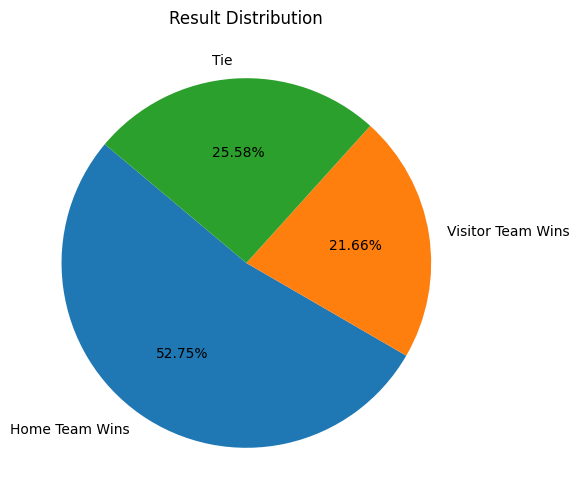

In [174]:
valores = [num_victories_local, num_defeats_local, num_draws]

etiquetas = ['Home Team Wins', 'Visitor Team Wins', 'Tie']

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%.2f%%', startangle=140)
plt.title("Result Distribution")

plt.show()

Exercise 2:

What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division. What have been the biggest wins? Of course, when we say biggest we mean those with the highest goal difference. Show the top ten of them in a table.

In [175]:
# Filter the DataFrame for matches already played in the 1st division
df_firstdivmatches = df_matches[(df_matches['division'] == 1) & (df_matches['score'] != '-1:-1')]
#df_homegrouped = df_firstdivmatches.sort_values(by = 'home_team', ascending=True)
#print(df_firstdivmatches.columns,df_firstdivmatches.iloc[0])

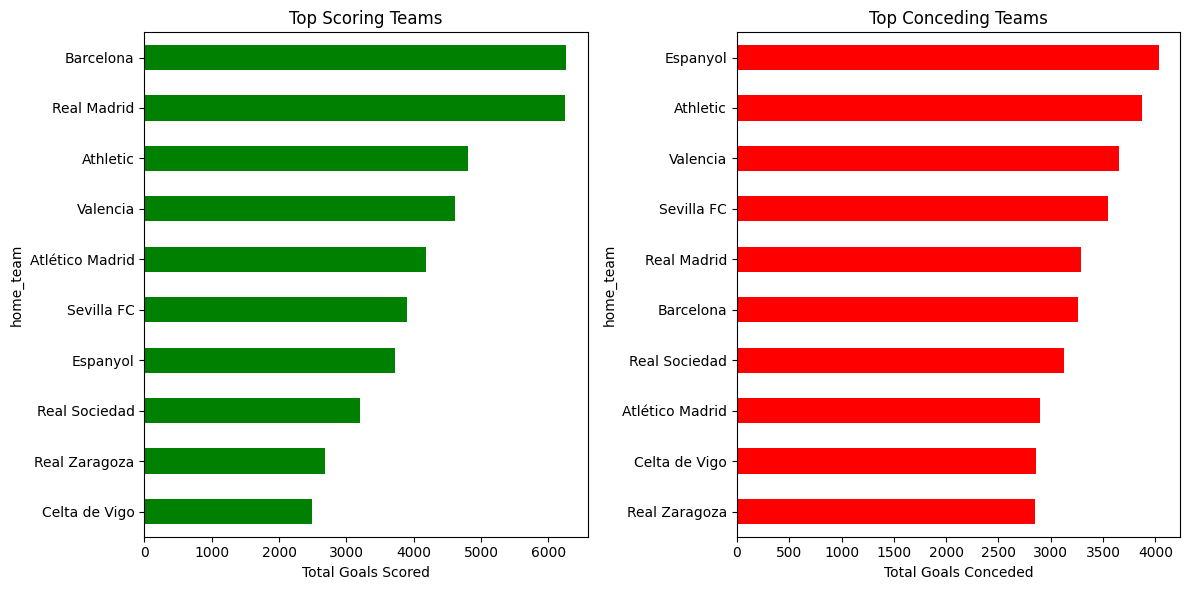

In [176]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for top-scoring teams
top_scoring_teams.plot(kind='barh', color='green', ax=ax1)
ax1.set_xlabel('Total Goals Scored')
ax1.set_title('Top Scoring Teams')
ax1.invert_yaxis()

# Bar plot for top-conceding teams
top_conceding_teams.plot(kind='barh', color='red', ax=ax2)
ax2.set_xlabel('Total Goals Conceded')
ax2.set_title('Top Conceding Teams')
ax2.invert_yaxis()

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()

Exercise 3:

There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.

Exercise 4:

Build a cross results table for season 2020-2021 (1st division). Figure 1 in the instructions is an example taken from Wikipedia. Try to make it the most similar to this one, painting the background of each cell according to result (green in case local team wins and red in case visitor team wins). Also, could you model the intensity of this background color with the goal difference from the match?

Write a function that, given the season and division, plots the cross results table. Function prototype should be like plot_cross_results_table(season, division) and return the plot object.

Exercise 5:

As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? Show both things in two pie charts, side by side. Remember to consider ties in the first one.

Write a function that, given two team names, plots the two graphs described above. Function prototype should be like plot_direct_confrontations_- stats(team1, team2) and return the plot object. Use it with some other classical rivals like Betis and Sevilla.

Exercise 6:

Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games without losing. That was, by far, the longest undefeated streak in their history. Which teams have had the longest undefeated streaks? Show the longest undefeated streaks in a horizontal bar plot, indicating in each bar the team name and the dates it held that streak, for instance, Real Sociedad 22/04/1979 - 04/05/1980.

Exercise 7:

Create a table with the final standings of each season (and division), that is, a table that contains all the teams ordered (in descending order) by the number of points they got during that season, and some other aggregate statistics. The table must contain the following columns: season, division, ranking, team, GF (total goals scored), GA (total goals conceded), GD (goals difference), W (total wins), L (total loses), T (total ties), Pts (points). Remember that, in football, you earn 3 points per victory, and 1 point per tie (none for loses). In case two teams have same number of points, order by GD (descending), and then by GF (also descending). Order the table so that standings of one season come before standings of previous one, and standings of 1st division come before standings of 2nd division. Save the final tabel in Excel with the name SeasonStandings.xlsx in the reports/ folder.

Exercise 8:

Villarreal is a team that has grown a lot in recent decades. Specially ever since some billionaire guy bought it (Fernando Roig, from Mercadona). Make a line plot showing the rank of Villarreal at the end of each season, from the oldest ones (left) to the earliest ones (right). Consider rankings in 2nd division to be a continuation of the 1st one, that is, if there’s N teams in 1st division and Villarreal got r position in 2nd division, then it should be placed in N +r. Draw in the same plot a line showing the cut between 1st and 2nd division.

Write a function that, given n team names, plots the graph described above of each one of them superposed. Function prototype should be like plot_ranking_evolution(team1, team2, ..., teamN) and return the plot object (note that function should not take one array-type argument, but n arguments). Use it to compare the evolution of all the teams that currently play in 1st division.

Exercise 9:

In football jargon, those teams that are permanently descending and ascending between 1st and 2nd division are called elevator teams. What are the most elevator teams in LaLiga? Plot the history of the top 5 of them using the function from exercise 8.

Exercise 10:

Create a table that is the same as the one in exercise 7, but not only with the season final standings, but the standings at the end of each matchday. Columns are the same, including matchday that tells about which matchday from the season these standings are from. Would you be able to add a new column last_5 with the result of last 5 matches? This column should contain a list like ["W", "L", "W", "T", "T"]. In this list, the first item is the immediate previous match, the second one is the match before this one, and so on. If there are no 5 previous matches (because matchday < 6, for instance) then just make the list shorter.

Save the final table in Excel with the name MatchdayStandings.xlsx in the
reports/ folder.

In [177]:
cursor.close()
sqliteConnection.close()